In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Starting Level = 0.000, Final Level = 24.500


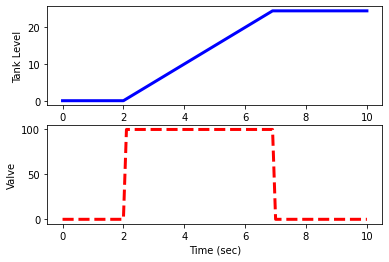

In [5]:
# define tank model
def tank(Level,time,c,valve):
    rho = 1000.0 # water density (kg/m^3)
    A = 1.0      # tank area (m^2)
    # calculate derivative of the Level
    dLevel_dt = (c/(rho*A)) * valve
    return dLevel_dt

# time span for the simulation for 10 sec, every 0.1 sec
ts = np.linspace(0,10,101)

# valve operation
c = 50.0          # valve coefficient (kg/s / %open)
u = np.zeros(101) # u = valve % open
u[21:70] = 100.0  # open valve between 2 and 7 seconds

# level initial condition
Level0 = 0

# for storing the results
z = np.zeros(101)

# simulate with ODEINT
for i in range(100):
    valve = u[i+1]
    y = odeint(tank,Level0,[0,0.1],args=(c,valve))
    Level0 = y[-1] # take the last point
    z[i+1] = Level0 # store the level for plotting

    
print('Starting Level = {0:.3f}, Final Level = {1:.3f}'.format(z[0], z[-1]))
# plot results
plt.figure()
plt.subplot(2,1,1)
plt.plot(ts,z,'b-',linewidth=3)
plt.ylabel('Tank Level')
plt.subplot(2,1,2)
plt.plot(ts,u,'r--',linewidth=3)
plt.ylabel('Valve')    
plt.xlabel('Time (sec)')
plt.show()